# In Class Lab 14 Template
# Cosmological Tools

In this lab we will build on the Class called `CosmologicalTools` that we developed as part of Lab 12 and 13. 

For Lab 14 we will create a function to understand the temperature evolution of the universe and the horizon distance. 

In [1]:
# import modules
import numpy as np
import astropy.units as u

# For Lab 12: Import the constant for the speed of light
from astropy.constants import c
# For Lab 14: Import the boltzmann constant
from astropy.constants import k_B 

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


# Lab 12 : added
# integrating tools from SciPy  
from scipy.integrate import simps


In [2]:
k_B

<<class 'astropy.constants.codata2014.CODATA2014'> name='Boltzmann constant' value=1.38064852e-23 uncertainty=7.9e-30 unit='J / K' reference='CODATA 2014'>

In [7]:
k_B_eV = k_B.to(u.electronvolt/u.K)
k_B_eV

<Quantity 8.61733034e-05 eV / K>

In [8]:
# Define the benchmark cosmology at z =0
# Planck 2016 results. XIII. Cosmological parameters   
# Planck Collaboration+2016 A&A 594 13  Table 4, column 2 

OmegaM0_planck = 0.308   # Matter Density Parameter
OmegaR0_planck = 8.24e-5  # Radiation Density Parameter
OmegaL0_planck = 0.692  # Dark Energy Density Parameter
h_planck = 0.6781   # Hubble Constant  100 h km/s/Mpc
        

In [44]:
class CosmologicalTools:
    # Define a class that provides functions to compute various cosmological quantities
    # for a given cosmology  
        
    def __init__(self, OmegaM0, OmegaR0, OmegaL0, h):
        # initialize the instance of the class - for any given Cosmology
        # Input:    Omega M matter density parameter at z=0
        #           Omega R radiation density parameter at z=0
        #           Omega L  dark energy density parameter at z=0
        #           h  normalization for the hubble parameter at z=0
        
        # initialize the cosmology at z=0
        self.OmegaM0 = OmegaM0    ### Matter Density Parameter
        self.OmegaR0 = OmegaR0    ### Radiation Density Parameter
        self.OmegaL0 = OmegaL0    ### Dark Energy Density Parameter
        self.OmegaK0 = 1 - (OmegaM0 + OmegaR0 + OmegaL0)    #### Curvature Density Parameter
    
        self.h = h   # Normalization of Hubble Parameter   
        self.Ho = h*100*u.km/u.s/u.Mpc #  Hubble Constant at z=0  100 h km/s/Mpc
    
    
    # Question 1 A)
    def HubbleParameter(self, z):
        # Function that defines the Hubble Parameter as a function of redshift
        # Input:   Redshift z 
        # Returns: The Hubble parameter at the given redshift in units of km/s/Mpc        
        
        # FILL THIS IN 
        M = self.OmegaM0*(1+z)**3
        R = self.OmegaR0*(1+z)**4
        L = self.OmegaL0
        K = self.OmegaK0*(1+z)**2
        
        return  self.Ho*np.sqrt(M+R+L+K)
    
    
    
    # Question 2 A)
    def OmegaM_Z(self,z):
        # Function that defines the matter density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Matter Density Parameter at the given redshift.
        
        # FILL THIS IN
        return self.OmegaM0*(1+z)**3*self.Ho**2/self.HubbleParameter(z)**2
    
    def OmegaR_Z(self,z):
        # Function that defines the radiation density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Radiation Density Parameter at the given redshift.
        
        # FILL THIS IN
        return self.OmegaR0*(1+z)**4*self.Ho**2/self.HubbleParameter(z)**2
    
    
    def OmegaL_Z(self,z):
        # Function that defines the dark energy density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Dark Energy Density Parameter at the given redshift.
        
        # FILL THIS IN
        return self.OmegaL0*self.Ho**2/self.HubbleParameter(z)**2
    
    
 
    
    # Question 1 A) 
    
    def LookBackTime(self, ze):
    # Function that computes the look back time at a given redshift
    # i.e. the difference in time from when a photon was emitted to when it is observed at present day.
    # Input:    Redshift emitted (ze). This cannot be an array. 
    # Output:   Time in units of Gyr Ago  (relative to present day). This is not an arrat    
    
        # Observed redshift  
        zo = 0
    
        # define an array with redshifts, spaced in intervals of 0.001 from zo to ze
        zrange = np.arange(zo, ze, 1e-3)
        
        # y = (1/H(zrange)).to(GYR)  /  (1+zrange)
        # But need to correct units of 1/H to be Gyr rather than seconds  
        # use the astropy.units functionality .to(units)
        # FILL THIS IN 
        y = (1.0/self.HubbleParameter(zrange)).to(u.Gyr)/(1+zrange)  
        
        # Integrate y numerically over zrange and return in units of Gyr
        # FILL THIS IN 
        return simps(y,zrange)*u.Gyr
    
    
    # Question 2 A) 
    
    def ComovingDistance(self, ze):
    # Function that returns the Comoving Radial Distance to an object at a given redshift
    # Distance to a galaxy that is moving with the Hubble Flow (expanding universe) at a given redshift
    # Input:    Redshift observed (zo) 
    #           Redshift emitted (ze)
    # Output:   DC in Mpc

        zo = 0
    
        # define an array with redshifts, spaced  in intervals of 0.001
        # Note that if you want redshifts smaller than 0.001 you'll need to refine this
        zrange = np.arange(zo,ze, 1e-3)
    
        # 1/H(zrange)*speed of light
        # Speed of light is loaded in modules from astropy, but in units of m/s --> need in km/s
        # FILL THIS IN
        y = c.to(u.km/u.s)*(1.0/self.HubbleParameter(zrange))
    
        # Integrate y numerically over zrange and return in units of Mpc
        # FILL THIS IN 
        return simps(y,zrange)*u.Mpc
    
    
    # Question 2 D) 
    
    def ProperDistance(self, zo, ze):
    # Function that returns the Proper Distance 
    # of an comoving distance measured today, at a given redshift (the distance measured by a ruler)
    # Input:    Redshift observed (zo) 
    #           Redshift of object (ze)
    # Output:   Proper Distance in Mpc
    
        # Comoving Distance (to emitted photon) [ independent of time] x the scale factor 
        # at the time of observation.
        return self.ComovingDistance(ze)/(1+zo)

 
    # Question 3 A)
    
    def LuminosityDistance(self, ze): 
    # Function that computes DL, the luminosity distance of a galaxy at a given redshift
    # Input:    Redshift emitted (ze) 
    # Output:   DL  in Mpc
        # this is an observable so
        zo = 0
        # Return  DL = DC*(1+z)
        return self.ComovingDistance(ze)*(1+ze)
    

    # Question 4 A)
    
    def AngularDiameterDistance(self, ze): 
    # Function that computes DA, the angular diameter distance at a given redshift
    # This is the proper distance between us and the source, at the time the photons were emitted.
    # Physical size of angular separation of 1 degree
    # Input:   Redshift emitted (ze)
    # Output:   DA  in Mpc
    
        
        # this is an observable so
        zo = 0
        
        # # FILL THIS IN
        # DA = DC/(1+z_emitted) = DL/(1+z)**2
        return self.ComovingDistance(ze)/(1+ze)     
    
    
    # Question 4 B) 
    
    def Separation(self, ze, angle):
    # Function to compute the physical distance corresponding to an angular separation at a given redshift
    # Input:    Redshift emmitted ze ,  
    #           angle: Angle between galaxies in arcsec
    # Output:  Distance in kpc
    
        # convert angle from arcsec to radians
        #    FILL THIS IN
        angleRad = (angle*u.arcsec).to(u.rad)
    
         # FILL THIS IN
        #   DA*angleRad
        return (self.AngularDiameterDistance(ze)*angleRad/u.rad).to(u.kpc)
    
    

    ################
    ## Lab 14  Starts here
    ################
    
    # Q1
    def Temperature(self, z):
        # function that returns the temperature of the universe as a function of redshift
        #Input: Redshift of interest
        # Returns: Temperature in K
        To = 2.73
        
        # Fill this in 
        #To(1+z)
        return To*(1+z)
    
    # Q2 
    # 
    ## Fill this in 
    def HorizonDistance(self, zo):
        # Compute the proper distance to the horizon at a given redshift
        # DC(zo,ze)/(1+zo)
        # input: Redshift of the observer
        # Returns the proper distance (Mpc)
        
        # define an array with redshifts, spaced  in intervals of 0.001
        # Note that if you want redshifts smaller than 0.001 you'll need to refine this
        zrange = np.arange(zo, 5000, 1e-3)
    
        # 1/H(zrange)*speed of light
        # Speed of light is loaded in modules from astropy, but in units of m/s --> need in km/s
        # FILL THIS IN
        y = c.to(u.km/u.s)*(1.0/self.HubbleParameter(zrange))
    
        # Integrate y numerically over zrange and return in units of Mpc
        # FILL THIS IN 
        Comoving = simps(y,zrange)*u.Mpc
        
        # Proper distance Comoving/(1+z)
        distance = Comoving/(1+zo)
        return distance
    
    # Q3 
    ## Fill this in 
    def SoundHorizon(self,zdecouple):
        # The Maximal distance that sound can travel since the beginning of the universe to the time of 
        # decoupling
        # DC(zdecouple, zinfty)*speed of sound
        # Input:  Redshift of decoupling
        # Returns: Distance of Sound Horizon in Mpc
        
        dist = self.HorizonDistance(zdecouple)/np.sqrt(3)
        return dist
    

In [45]:
# Define here an instance of the Class Cosmological Tools that follows the Benchmark Cosmology

Benchmark = CosmologicalTools(OmegaM0_planck, OmegaR0_planck, OmegaL0_planck, h_planck)


# Question 1

Complete the function `Temperature` to examine the Evolution of the average temperature of the universe as a function of time. 

$T(z) = T_o(1+z)$ 

Where $T_o = 2.7$K, the black body temperature that describes the CMB

- What is the temperature needed to ionize a hydrogen atom (13.6eV). 
- How does this temperature compare to the temperature at photon-electron decoupling era (Z = 1100)

In [13]:
# E = 3kBT

T = 13.6*u.electronvolt/(3*k_B_eV)
T

<Quantity 52607.16667382 K>

In [14]:
# redshift of Photon Decoupling
zDecoupling = 1100

In [24]:
# Temperature at z = 1100
Benchmark.Temperature(zDecoupling)

3005.73

In [28]:
# Redshift where it should have happened! 
Benchmark.Temperature(20000)

54602.73

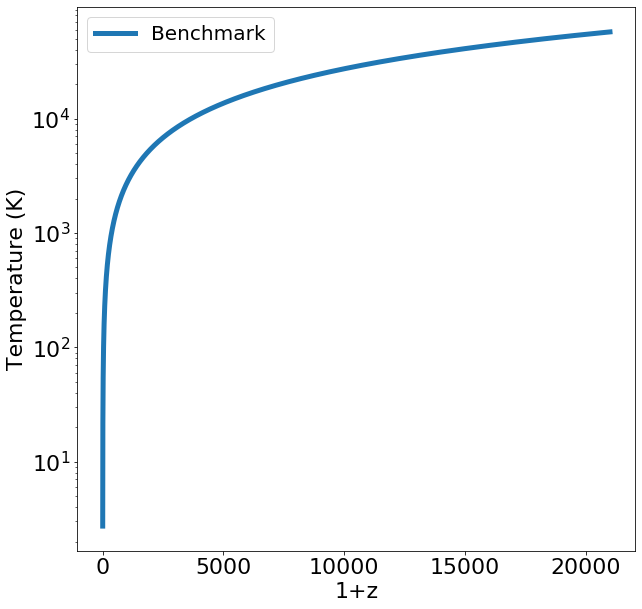

In [27]:
# Plot the Temperature Evolution as a Function of Redshift
###############################################################################

zmax = 21000
zmin = 0.001
zrange = np.arange(zmin, zmax, 0.5) 


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# Temperature
# FILL THIS IN
plt.semilogy(zrange +1, Benchmark.Temperature(zrange) , linewidth=5, label='Benchmark')


# Add axis labels
plt.xlabel('1+z', fontsize=22)
plt.ylabel('Temperature (K)', fontsize=22)


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

legend = ax.legend(loc='upper left',fontsize=20)

# Save to a file
ax.set_rasterized(True)
plt.savefig('Temperature.png', rasterized=True, dpi=350)

# Question 2

Define the horizon distance. 

Complete the function  ``HorizonDistance`` that takes as input: the redshift when the photon was observed and the redshift when the photon was emitted.  The function returns the Comoving Radial Distance from an observer at z=z_o, $D_C(z)$, by numerically integrating the below: 

$D_C(z0,ze) = c \int_{z_0}^{z_e} \frac{dz'}{H(z')}$

Where $c$ is the speed of light.  Where  $z_0$= zObs is the redshift of the observer, $z_e$ is the redshift of the horizon (say $z_e$ = 5000).  

And then translating this to proper distance:

$d_{horizon}$ = D$_C$(zObs,5000)/(1+zObs)
 



In [40]:
# Horizon distance at that scale in the benchmark cosmology
# Radius of observable universe
# ProperDistance(zobs, zemitted), where we are an observed at zDecoupling
Horizon = Benchmark.HorizonDistance(zDecoupling)
Horizon

<Quantity 0.18332163 Mpc>

In [39]:
# Angular Diameter distance to  z = 1100 
AngDiam_Zdecouple = Benchmark.AngularDiameterDistance(zDecoupling)
AngDiam_Zdecouple

<Quantity 12.6371462 Mpc>

In [43]:
# Angular Scale of the Causally Connected region:  Angle the horizon would subtend on the sky. 
# Theta = Size / Distance = Horizon*2 / Angular Diameter Distance  
Theta = 2*Horizon/AngDiam_Zdecouple*u.radian.to(u.degree)
Theta

<Quantity 1.66233031>

# Question 3 A

What is the sound horizon at the time of photon-electron decoupling?

Complete the function `SoundHorizon`, which is similar to the horizon distance except the relevant speed is the speed of sound in a photon-electron fluid 

$c_s$ = c/sqrt(3)

Sound Horizon = $ \frac{c_s}{1+z_e} \int_{z_d}^{z_e} \frac{dz'}{H(z')}$

  Where  $z_d$= zDecoupling is the redshift at decoupling, $z_e$ is the redshift of the horizon (say $z_e$ = 5000).  


In [46]:
# Sound Horizon  
Sound = Benchmark.SoundHorizon(zDecoupling)
Sound

<Quantity 0.10584079 Mpc>

# Question 3 B

What is the angular size subtended by the Sound Horizon Diameter?

Theta = Sound Horizon Diameter/ Angular Diameter Distance

In [48]:
# Angle subtended 
# Size/Distance = 2*sound horizon/Angular Diameter Distance
ThetaSound = 2*Sound/AngDiam_Zdecouple*u.radian.to(u.degree)

In [50]:
ThetaSound

<Quantity 0.95974685>